In [90]:
import cv2
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import Sequential 
from keras.layers import Dense , Conv2D , MaxPooling2D, Flatten
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import matplotlib.pyplot as plt



In [91]:
# مسیر اصلی فولدر
main_folder = 'datasets'

# یه لیست برای نگهداری عکس‌ها
images = []
labels = []

# loop روی فولدرهای 0 تا 9
for folder_name in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder_name)
    
    # loop روی عکس‌های داخل فولدر
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img)

        # خوندن عکس با cv2
        img = cv2.imread(img_path)
        img2 = cv2.cvtColor(img ,cv2.COLOR_BGR2GRAY)
        img3 = cv2.resize(img2 ,(10,10))
        images.append(img3)
        labels.append(int(folder_name))  #  برچسبش اسم فولدر باشه (0 تا 9)

X = np.array(images)
Y = np.array(labels)

In [92]:
X.shape

(80000, 10, 10)

In [93]:
Y.shape

(80000,)

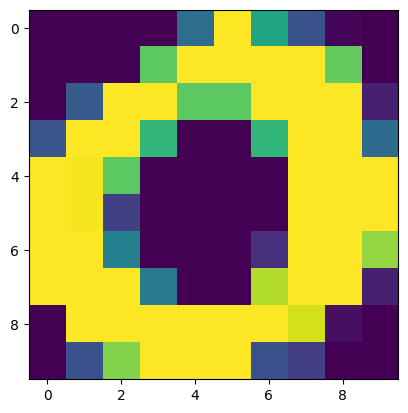

In [94]:
plt.imshow(X[4])

In [95]:
X = X /255

In [96]:
X_train , X_test , Y_train , Y_test = train_test_split(X ,Y ,test_size=0.2 , random_state=42 )

In [97]:
X_train= np.expand_dims(X_train , axis=3)
X_test= np.expand_dims(X_test , axis=3)

In [98]:
X_train.shape

(64000, 10, 10, 1)

In [99]:
model = Sequential()
model.add(Conv2D(filters= 8,kernel_size=(3,3) ,input_shape=(10,10,1) ,activation='relu'))
model.add(MaxPooling2D(2,2)) 
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(10))


c:\Users\Ali Mashaghi\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [101]:
model.fit(X_train, Y_train, epochs=10 , validation_data=(X_test,Y_test))

Epoch 1/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9125 - loss: 0.2961 - val_accuracy: 0.9637 - val_loss: 0.1230
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9714 - loss: 0.0962 - val_accuracy: 0.9733 - val_loss: 0.0858
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9766 - loss: 0.0765 - val_accuracy: 0.9768 - val_loss: 0.0748
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9798 - loss: 0.0656 - val_accuracy: 0.9792 - val_loss: 0.0663
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9814 - loss: 0.0596 - val_accuracy: 0.9794 - val_loss: 0.0663
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9828 - loss: 0.0543 - val_accuracy: 0.9805 - val_loss: 0.0605
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9843 - loss: 0.0500 - val_accuracy: 0.9821 - val_loss: 0.0551
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9851 - loss: 0.0465 - 

In [104]:
# UI
# پنجره اصلی
root = tk.Tk()
root.title("AI Image Tester 🧠")
root.geometry("300x400")

# ویجت‌ها
panel = tk.Label(root)
panel.pack(pady=10)

result_label = tk.Label(root, text="", font=("Arial", 14))
result_label.pack(pady=20)

# مسیر عکس انتخاب‌شده
img_path = None

# توابع بعد از تعریف ویجت‌ها
def predict_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (10, 10))  # سایز ورودی مدل خودت
    img = img / 255.0
    img = np.expand_dims(img, axis=(0, -1))  # شکل (1,10,10,1)
    prediction = model.predict(img)
    return np.argmax(prediction)

def open_file():
    global img_path, img_display
    img_path = filedialog.askopenfilename(
        title="یه عکس انتخاب کن",
        filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp")]
    )
    if img_path:
        img = Image.open(img_path)
        img = img.resize((150, 150))
        img_display = ImageTk.PhotoImage(img)
        panel.config(image=img_display)
        panel.image = img_display
        result_label.config(text="")

def test_model():
    if img_path:
        pred = predict_image(img_path)
        result_label.config(text=f"👾 مدل گفت: {pred}")
    else:
        result_label.config(text="اول یه عکس انتخاب کن 😅")

# دکمه‌ها
btn_load = tk.Button(root, text="📂 انتخاب عکس", command=open_file)
btn_load.pack(pady=5)

btn_test = tk.Button(root, text="🤖 پیش‌بینی", command=test_model)
btn_test.pack(pady=5)

# اجرای برنامه
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
